In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris= load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state = 35)

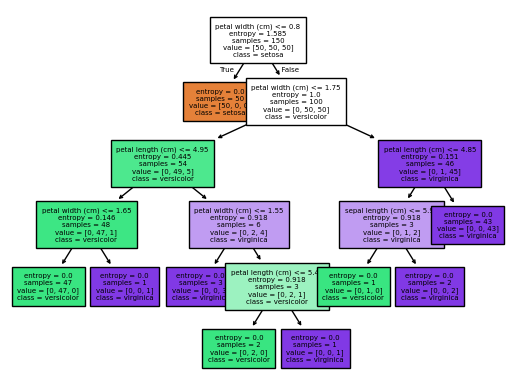

<Figure size 3500x2000 with 0 Axes>

In [36]:
classifier.fit(iris.data, iris.target)
tree.plot_tree (classifier, filled = True,feature_names=iris.feature_names, class_names=iris.target_names,fontsize=5)
plt.figure (figsize=(35,20))
plt.show()

                                                        Evaluation of Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=35)

In [43]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=35)

In [46]:
y_pred = classifier.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.11%


In [54]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      0.93      0.87        14
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [57]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[16  0  0]
 [ 0 13  1]
 [ 0  3 12]]


                                                            Feature Importance

In [58]:
feature_importances = classifier.feature_importances_

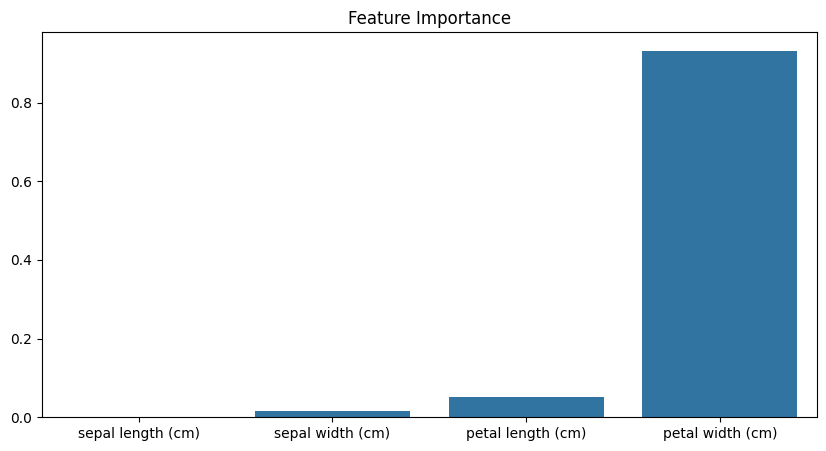

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x=iris.feature_names, y=feature_importances)
plt.title('Feature Importance')
plt.show()

                                                    Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

In [69]:
scores = cross_val_score(classifier, iris.data, iris.target, cv=5)

In [71]:
print(f"Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")

Cross-Validation Accuracy: 95.33%


                                                    Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

In [83]:
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

In [85]:
grid_search.fit(iris.data, iris.target)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=35),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy')

In [89]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 97.33%
